### AB Testing Case Study

The file ABtesting.csv contatins the results of an experiment where two versions of an online retailer's webpage are compared. \
Visitors to the retailer's webpage are randomly assigned to a control (old design) or treatment (new design) group. \
The variable ___treat___ identifies how each new visitor is assigned. \
A conversion occcurs if a visitor goes on to complete a sale in which case we have ___conversion___ = 1, if not ___conversion___ = 0.

In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
## load the dataset.
df = pd.read_csv('ABtesting.csv')

In [63]:
df.head()

,time,treat,conversion
0,0.0,control,0
1,1.0,control,0
2,1.0,treatment,0
3,1.0,treatment,0
4,2.0,treatment,0


### Cross-Tabulation

A quick cross-tabulation can show us how many people in the treatment and control group do and do not convert.

In [64]:
ct = pd.crosstab(df['treat'], df['conversion'], normalize='index')

We can visualize these results using a bar plot.

In [65]:
plt.style.use('seaborn-whitegrid')

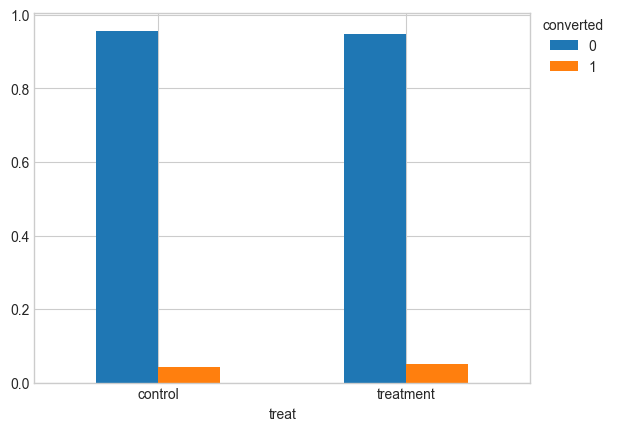

In [66]:
ax = ct.plot(kind='bar', stacked=False, rot=0)
ax.legend(title='converted', bbox_to_anchor=(1, 1.02), loc='upper left')

We can also check the visualize conversation rate for each groups.

<Axes: xlabel='treat', ylabel='conversion'>

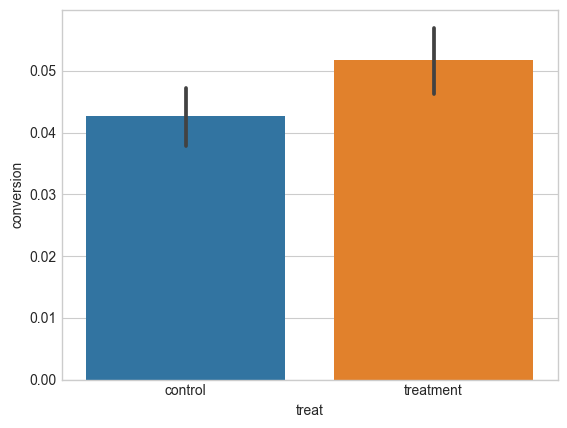

In [67]:
sns.barplot(data=df, x='treat', y='conversion')

### Data Preprocessing

In [68]:
dfc= df[df['treat']=='control'] ## dataframe for control group.
dft= df[df['treat']=='treatment'] ## dataframe for treatment group.

#### Calculate conversion rate.

- Control Group

In [69]:
### Include a cust_no variable.
Nc = len(dfc.index)
dfc['cust_no'] = np.arange(0, Nc)+1
dfc.head()

,time,treat,conversion,cust_no
0,0.0,control,0,1
1,1.0,control,0,2
5,2.0,control,0,3
7,5.0,control,0,4
9,7.0,control,0,5


In [70]:
## Create the cumulative conversion variable.
dfc['cumuconv'] = np.around(np.cumsum(dfc['conversion']), 0)

In [71]:
dfc['cumuconv'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [72]:
## create conversion rate variable.
dfc['conv_rate'] = dfc['cumuconv']/dfc['cust_no']

In [73]:
dfc

,time,treat,conversion,cust_no,cumuconv,conv_rate
0,0.0,control,0,1,0,0.000000
1,1.0,control,0,2,0,0.000000
5,2.0,control,0,3,0,0.000000
7,5.0,control,0,4,0,0.000000
9,7.0,control,0,5,0,0.000000
...,...,...,...,...,...,...
13994,10464.0,control,0,6997,299,0.042733
13995,10464.0,control,0,6998,299,0.042726
13996,10465.0,control,0,6999,299,0.042720
13998,10468.0,control,0,7000,299,0.042714


#### Calculate conversion rate.

- Control Group

In [74]:
### Include a cust_no variable.
Nt = len(dft.index)
dft['cust_no'] = np.arange(0, Nt)+1
dft.head()

,time,treat,conversion,cust_no
2,1.0,treatment,0,1
3,1.0,treatment,0,2
4,2.0,treatment,0,3
6,4.0,treatment,0,4
8,6.0,treatment,0,5


In [75]:
## Create the cumulative conversion variable.
dft['cumuconv'] = np.around(np.cumsum(dft['conversion']), 0)

In [76]:
## create conversion rate variable.
dft['conv_rate'] = dft['cumuconv']/dft['cust_no']

In [77]:
dft.describe()

,time,conversion,cust_no,cumuconv,conv_rate
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,5253.023718,0.051722,3500.000000,169.329047,0.045251
std,2997.437325,0.221480,2020.581599,105.773435,0.006714
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2660.000000,0.000000,1750.500000,79.000000,0.043413
50%,5276.000000,0.000000,3500.000000,166.000000,0.047708
75%,7786.000000,0.000000,5249.500000,264.000000,0.049588
max,10466.000000,1.000000,6999.000000,362.000000,0.057143


### Data Visualization

Here we plot the cumulative conversion against the number of visitors.\
It is also possible to do a plot against time, but it looks about the same.\
The second visualization is of the conversion rate against the number of visitors.

- Plot for cumulative conversion.

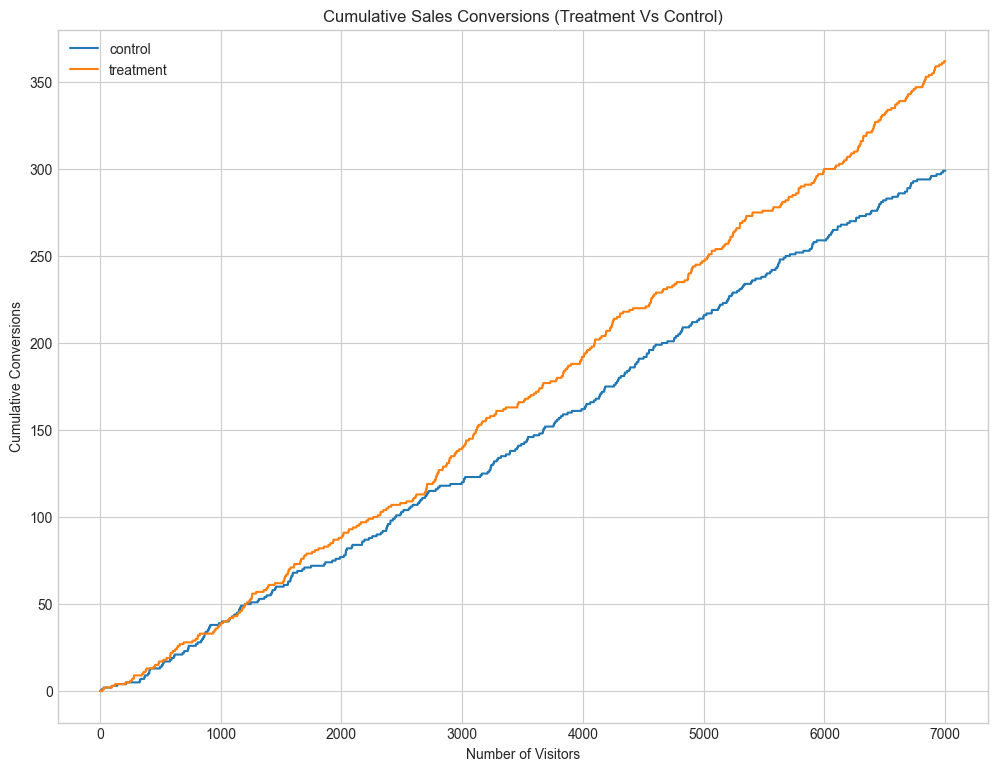

In [78]:
fig = plt.figure(figsize=(12, 9))
ax = plt.axes()
x = dfc['cust_no']
y = dfc['cumuconv']
ax.plot(x, y, label='control')
x= dft['cust_no']
y= dft['cumuconv']
ax.plot(x, y, label='treatment')

ax.set_xlabel("Number of Visitors")
ax.set_ylabel("Cumulative Conversions")
ax.set_title("Cumulative Sales Conversions (Treatment Vs Control)")
ax.legend(loc="best")
plt.show()

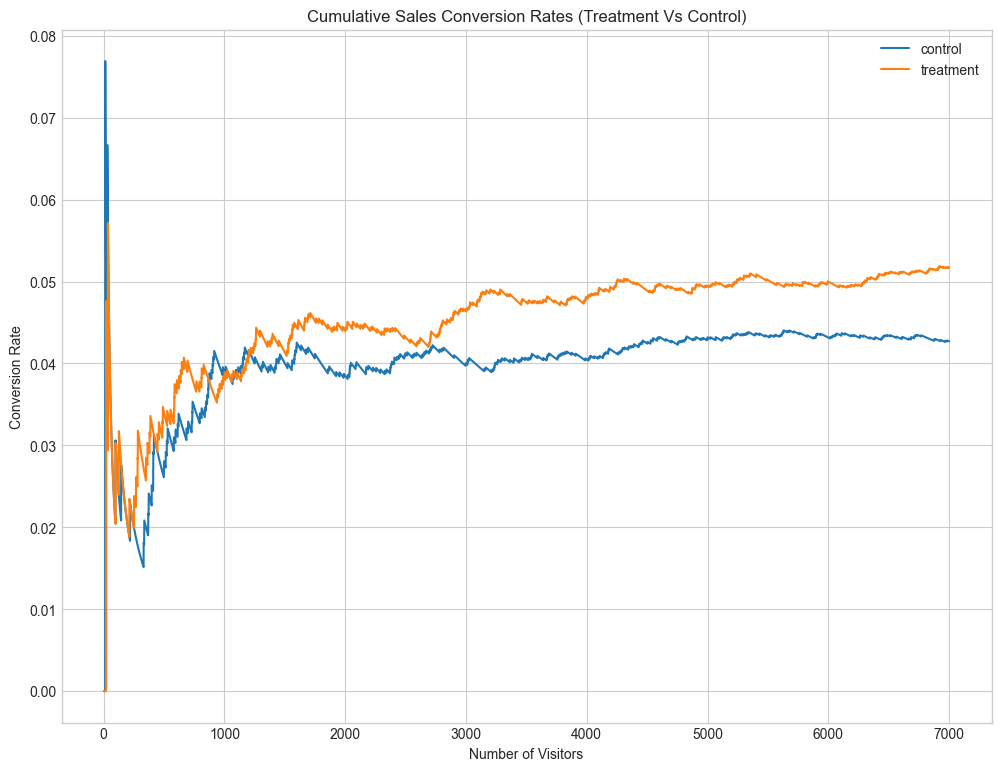

In [79]:
fig = plt.figure(figsize=(12, 9))
ax = plt.axes()
x = dfc['cust_no']
y = dfc['conv_rate']
ax.plot(x, y, label='control')
x= dft['cust_no']
y= dft['conv_rate']
ax.plot(x, y, label='treatment')

ax.set_xlabel("Number of Visitors")
ax.set_ylabel("Conversion Rate")
ax.set_title("Cumulative Sales Conversion Rates (Treatment Vs Control)")
ax.legend(loc="best")
plt.show()

### Two-sample hypothesis tests and confidence intervals for differences in proportions.

Let's perform the hypothesis test using statmodels in Python. Difference in rates are computed as control minus treatment\
So a negative value indicates an increase in conversion rates.

In [80]:
## Import the library and methods
import statsmodels.stats.proportion as stp

In [84]:
Sc = dfc['conversion'].sum()
Nc = Nc

St = dft['conversion'].sum()
Nt = Nt

In [86]:
### Calculate the z-statistic and p-value
z_stat, pval = stp.test_proportions_2indep(Sc, Nc, St, Nt, compare='diff', alternative='two-sided')

In [87]:
### Calculate the confidence interval
(lower, upper) = stp.confint_proportions_2indep(Sc, Nc, St, Nt, compare='diff', alpha=0.05)

In [90]:
print(f"z statistic: {z_stat:.2f}")

z statistic: -2.51


In [91]:
print(f"p-value: {pval:.3f}")

p-value: 0.012


In [93]:
print(f"95% CI for difference in Proportion: [{lower:.3f}, {upper:.3f}]")

95% CI for difference in Proportion: [-0.016, -0.002]


In [94]:
pval < 0.05

True